# 구글 드라이브

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/BigContest')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

sido_path = "data/map/sido.shp"
sigungu_path = 'data/map/sig.shp'
emd_path = 'data/map/emd.shp'
sido = gpd.read_file(sido_path, encoding = 'cp949')
sigungu = gpd.read_file(sigungu_path, encoding = 'cp949')
emd = gpd.read_file(emd_path, encoding = 'cp949')
hdong = pd.read_csv('data/map/hdong_cd.csv')
hdong

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN
...,...,...,...,...,...,...,...,...
21772,5183035000,강원특별자치도,양양군,강현면,5183035038,장산리,20230611,NaN
21773,5183035000,강원특별자치도,양양군,강현면,5183035039,전진리,20230611,NaN
21774,5183035000,강원특별자치도,양양군,강현면,5183035040,주청리,20230611,NaN
21775,5183035000,강원특별자치도,양양군,강현면,5183035041,적은리,20230611,NaN


In [29]:
emd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EMD_CD      5066 non-null   object  
 1   EMD_ENG_NM  5065 non-null   object  
 2   EMD_KOR_NM  5066 non-null   object  
 3   geometry    5066 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 158.4+ KB


In [30]:
hdong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21777 entries, 0 to 21776
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정동코드   21777 non-null  int64  
 1   시도명     21777 non-null  object 
 2   시군구명    21607 non-null  object 
 3   읍면동명    21484 non-null  object 
 4   법정동코드   21777 non-null  int64  
 5   동리명     21762 non-null  object 
 6   생성일자    21777 non-null  int64  
 7   말소일자    0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ MB


In [31]:
hdong['행정동코드'] = hdong.행정동코드.astype('object')

In [32]:
emd['행정동코드'] = emd.EMD_CD+ '00'
emd = emd.drop(columns = 'EMD_CD')
emd = emd[['행정동코드', 'EMD_KOR_NM', 'geometry']]
emd

,행정동코드,EMD_KOR_NM,geometry
0,1111010100,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,1111010200,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,1111010300,궁정동,"POLYGON ((953560.228 1954257.466, 953561.19 19..."
3,1111010400,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,1111010500,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...
5061,5280039000,상서면,"POLYGON ((924979.638 1740610.214, 924985.428 1..."
5062,5280040000,하서면,"POLYGON ((924910.563 1749481.985, 924971.3 174..."
5063,5280041000,줄포면,"POLYGON ((929554.188 1736493.399, 929554.106 1..."
5064,5280042000,위도면,"MULTIPOLYGON (((890358.231 1737258.351, 890358..."


In [35]:
merged_gdf = pd.merge(emd, hdong, on = '행정동코드', how = 'right')
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry = 'geometry')
merged_gdf

,행정동코드,EMD_KOR_NM,geometry,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,NaN,None,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,NaN,None,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,NaN,None,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,NaN,None,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,NaN,None,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN
...,...,...,...,...,...,...,...,...,...,...
21772,5183035000,NaN,None,강원특별자치도,양양군,강현면,5183035038,장산리,20230611,NaN
21773,5183035000,NaN,None,강원특별자치도,양양군,강현면,5183035039,전진리,20230611,NaN
21774,5183035000,NaN,None,강원특별자치도,양양군,강현면,5183035040,주청리,20230611,NaN
21775,5183035000,NaN,None,강원특별자치도,양양군,강현면,5183035041,적은리,20230611,NaN


In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,585 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123622 files and dire

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

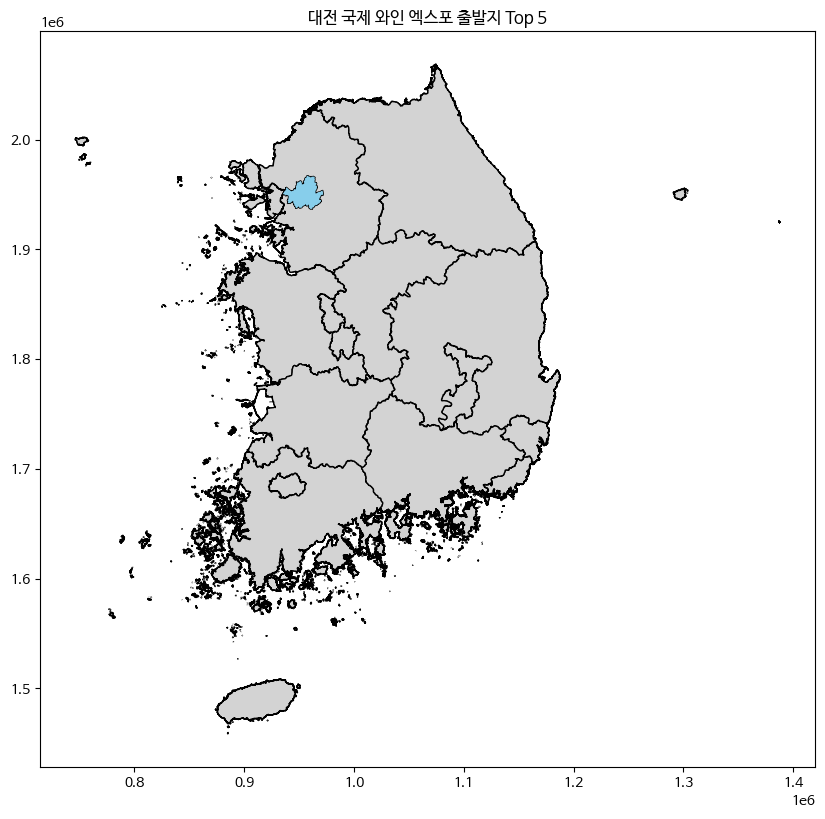

In [13]:
d_top5 = ['302005400', '3020060000', '301764000', '301765000', '3020057000']
# areas =
# lonmin, latmin, lonmax, latmax = world[selection].total_bounds
# ax = world.plot(color=world.color, figsize=(4,4))
# ax.axis("equal")
# ax.axis([lonmin, lonmax, latmin, latmax])
fig, ax = plt.subplots(figsize=(10, 10))
# 시도
sido.plot(ax=ax, color='lightgrey', edgecolor='black')
sido.plot(ax=ax, color='lightgrey', edgecolor='black')
seoul.plot(ax=ax, color='skyblue')

plt.title('대전 국제 와인 엑스포 출발지 Top 5')

plt.show()
